#Assignment: Building a Text‑Classification Pipeline & Word‑Embedding Exploration

# Loading the Dataset : SMS Spam Collection

## Data Acquisition & Exploration

In [3]:
!unzip sms+spam+collection.zip

unzip:  cannot find or open sms+spam+collection.zip, sms+spam+collection.zip.zip or sms+spam+collection.zip.ZIP.


In [4]:
import pandas as pd

# Read file without extension, assuming it's tab-separated
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


In [6]:
df.groupby('label').apply(lambda x: x.sample(3, random_state=42)).reset_index(drop=True)

/tmp/ipython-input-1564291005.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('label').apply(lambda x: x.sample(3, random_state=42)).reset_index(drop=True)


,label,message
0,ham,If i not meeting ü all rite then i'll go home ...
1,ham,"I.ll always be there, even if its just in spir..."
2,ham,"Sorry that took so long, omw now"
3,spam,Summers finally here! Fancy a chat or flirt wi...
4,spam,This is the 2nd time we have tried 2 contact u...
5,spam,Get ur 1st RINGTONE FREE NOW! Reply to this ms...


## Pre‑processing Pipeline

In [7]:
!pip install -q emoji
!pip install -q nltk

import re
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize


nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt')
nltk.download('punkt_tab')




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

##Cleaning and Tokenize

In [8]:
def preprocess_text(text):
  # Lower case
  text = text.lower()

  # Remove URLs
  text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

  # Remove emojis
  text = emoji.replace_emoji(text, replace='')

  # Remove non-alphanumeric characters (keeping spaces)
  text = re.sub(r'[^a-z0-9\s]', '', text)

  # Tokenize paragraphs to sentences
  sentences = sent_tokenize(text)

  processed_sentences = []
  for sentence in sentences:
    # Tokenize sentence to words
    tokens = word_tokenize(sentence)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    processed_sentences.append(tokens)

  # Flatten the list of lists of tokens if you want a list of all tokens
  # Or keep as list of lists if you need sentence structure
  # Here, we flatten to a single list of tokens per document
  flattened_tokens = [token for sentence_tokens in processed_sentences for token in sentence_tokens]

  return flattened_tokens

In [9]:
# Apply the preprocessing function to the 'message' column
df['processed_text'] = df['message'].apply(preprocess_text)

df.head()

,label,message,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t..."


In [10]:
for i in range(5):
  print("Orignal Text:", df.message[i])
  print("Preprocessed Text:", df.processed_text[i])

Orignal Text: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Preprocessed Text: ['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
Orignal Text: Ok lar... Joking wif u oni...
Preprocessed Text: ['ok', 'lar', 'joking', 'wif', 'u', 'oni']
Orignal Text: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Preprocessed Text: ['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', '87121', 'receive', 'entry', 'questionstd', 'txt', 'ratetcs', 'apply', '08452810075over18s']
Orignal Text: U dun say so early hor... U c already then say...
Preprocessed Text: ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
Orignal Text: Nah I don't think he goes to usf, he lives around here though

##Stamming and Lammatization

In [11]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet', quiet=True)

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def apply_stemming_and_lemmatization(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens] # Lemmatize after stemming
    return lemmatized_tokens

df['processed_text_stemmed_lemmatized'] = df['processed_text'].apply(apply_stemming_and_lemmatization)

# Display the first few rows to see the result
print("\nDataFrame with stemmed and lemmatized text:")
print(df.head())

# Print examples to show the difference
print("\nComparison of Original, Preprocessed, and Stemmed/Lemmatized Text:")
for i in range(5):
  print(f"\nExample {i+1}:")
  print("Original Text:", df.message[i])
  print("Preprocessed Text:", df.processed_text[i])
  print("Stemmed and Lemmatized Text:", df.processed_text_stemmed_lemmatized[i])


DataFrame with stemmed and lemmatized text:
  label                                            message  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                      processed_text  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3      [u, dun, say, early, hor, u, c, already, say]   
4  [nah, dont, think, goes, usf, lives, around, t...   

                   processed_text_stemmed_lemmatized  
0  [go, jurong, point, crazi, avail, bugi, n, gre...  
1                       [ok, lar, joke, wif, u, oni]  
2  [free, entri, 2, wkli, comp, win, fa, cup, fin...  
3      [u, dun, say, earl

##Feature Engineering

###Sparse

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Convert list of tokens back to string for vectorizers
df['processed_text_string'] = df['processed_text_stemmed_lemmatized'].apply(lambda x: ' '.join(x))

# Bag-of-Words (uni-gram and bi-gram)
bow_vectorizer = CountVectorizer(ngram_range=(1, 2))
bow_matrix = bow_vectorizer.fit_transform(df['processed_text_string'])

print("Bag-of-Words matrix shape:", bow_matrix.shape)

# TF-IDF (uni-gram and bi-gram)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text_string'])

print("TF-IDF matrix shape:", tfidf_matrix.shape)

Bag-of-Words matrix shape: (5572, 39144)
TF-IDF matrix shape: (5572, 39144)


###Library incompatability

In [2]:
!pip uninstall -y numpy scipy gensim

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
Found existing installation: gensim 4.3.2
Uninstalling gensim-4.3.2:
  Successfully uninstalled gensim-4.3.2


In [3]:
!pip install numpy==1.24.4 scipy==1.11.4 gensim==4.3.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
  Using cached gensim-4.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 19.1 MB/s eta 0:00:00
Using cached gensim-4.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.22.0 requires numpy>=1.26.0, but you have numpy 1.24.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.24.4 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.

In [1]:
from gensim.models import Word2Vec
import numpy as np


##Dense

In [13]:
from gensim.models import Word2Vec
import numpy as np

# Train Word2Vec
word2vec_model = Word2Vec(
    sentences=df['processed_text_stemmed_lemmatized'],
    vector_size=100,
    window=5,
    min_count=1,
    workers=4,
    sg=1
)

# Function to average word vectors for a document
def document_vector(word_list, model):
    word_list = [word for word in word_list if word in model.wv.index_to_key]
    if not word_list:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[word_list], axis=0)

# Apply function to get document embeddings
df['word2vec_embeddings'] = df['processed_text_stemmed_lemmatized'].apply(
    lambda x: document_vector(x, word2vec_model)
)

print("Word2Vec embeddings shape:", np.vstack(df['word2vec_embeddings']).shape)

# First 5 Embeddings
for i in range(5):
    print(f"Example {i+1}: {df['word2vec_embeddings'][i][:10]}...")


Word2Vec embeddings shape: (5572, 100)
Example 1: [-0.17131321  0.18627831  0.00402425  0.02119016  0.07638066 -0.28903335
  0.22346884  0.4404208  -0.08618575 -0.07771875]...
Example 2: [-0.1807354   0.2229573   0.00630465  0.03067022  0.07324033 -0.3364884
  0.25211003  0.50339264 -0.10338277 -0.09346791]...
Example 3: [-0.20256388  0.08928717  0.04593053 -0.02455409  0.08743457 -0.29282895
  0.24711062  0.46003723 -0.06912481 -0.09337605]...
Example 4: [-0.18761888  0.2723995  -0.01143925  0.05214622  0.0764135  -0.35611024
  0.26542664  0.5413052  -0.11308053 -0.10078807]...
Example 5: [-0.22344816  0.2554931   0.03545771  0.03501848  0.10365529 -0.3337395
  0.2854078   0.52094793 -0.12139238 -0.10753672]...


##Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

# Split data into training (70%), validation (10%), and test (20%) sets
X = df['processed_text_string'] # Using the processed text string for sparse features
y = df['label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp) # 0.2 of original data

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (3900,)
Validation set shape: (557,)
Test set shape: (1115,)


Multinomial Navie Bayes

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Re-vectorize the training data using the fitted vectorizers from the Feature Engineering step
# This is necessary because we split the data *after* fitting the vectorizers on the full dataset
# We need to transform the training, validation, and test sets separately using the vectorizers fitted on the full data.

# Assuming bow_vectorizer and tfidf_vectorizer were fitted on the full data in the Feature Engineering step (cell 48evrtuw96l0)
# If not, you would fit them here on the training data (X_train)

X_train_bow = bow_vectorizer.transform(X_train)
X_val_bow = bow_vectorizer.transform(X_val)
X_test_bow = bow_vectorizer.transform(X_test)

X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# Train Multinomial Naive Bayes on Bag-of-Words
mnb_bow = MultinomialNB()
mnb_bow.fit(X_train_bow, y_train)

print("Multinomial Naive Bayes model trained on Bag-of-Words.")

# Train Multinomial Naive Bayes on TF-IDF
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train_tfidf, y_train)

print("Multinomial Naive Bayes model trained on TF-IDF.")

Multinomial Naive Bayes model trained on Bag-of-Words.
Multinomial Naive Bayes model trained on TF-IDF.


SVM and Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Train Logistic Regression on Bag-of-Words
lr_bow = LogisticRegression(max_iter=1000)
lr_bow.fit(X_train_bow, y_train)
print("Logistic Regression model trained on Bag-of-Words.")

# Train Logistic Regression on TF-IDF
lr_tfidf = LogisticRegression(max_iter=1000)
lr_tfidf.fit(X_train_tfidf, y_train)
print("Logistic Regression model trained on TF-IDF.")

# Train Linear SVM on Bag-of-Words
svm_bow = LinearSVC(max_iter=10000)
svm_bow.fit(X_train_bow, y_train)
print("Linear SVM model trained on Bag-of-Words.")

# Train Linear SVM on TF-IDF
svm_tfidf = LinearSVC(max_iter=10000)
svm_tfidf.fit(X_train_tfidf, y_train)
print("Linear SVM model trained on TF-IDF.")

Logistic Regression model trained on Bag-of-Words.
Logistic Regression model trained on TF-IDF.
Linear SVM model trained on Bag-of-Words.
Linear SVM model trained on TF-IDF.


##Results

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_val, y_val, model_name, vectorizer_name):
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, pos_label='spam')
    recall = recall_score(y_val, y_pred, pos_label='spam')
    f1 = f1_score(y_val, y_pred, pos_label='spam')

    print(f"--- {model_name} with {vectorizer_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("-" * (len(model_name) + len(vectorizer_name) + 10))

# Evaluate Multinomial Naive Bayes models
evaluate_model(mnb_bow, X_val_bow, y_val, "Multinomial Naive Bayes", "Bag-of-Words")
evaluate_model(mnb_tfidf, X_val_tfidf, y_val, "Multinomial Naive Bayes", "TF-IDF")

# Evaluate Logistic Regression models
evaluate_model(lr_bow, X_val_bow, y_val, "Logistic Regression", "Bag-of-Words")
evaluate_model(lr_tfidf, X_val_tfidf, y_val, "Logistic Regression", "TF-IDF")

# Evaluate Linear SVM models
evaluate_model(svm_bow, X_val_bow, y_val, "Linear SVM", "Bag-of-Words")
evaluate_model(svm_tfidf, X_val_tfidf, y_val, "Linear SVM", "TF-IDF")

--- Multinomial Naive Bayes with Bag-of-Words ---
Accuracy: 0.9587
Precision: 0.8023
Recall: 0.9200
F1-score: 0.8571
---------------------------------------------
--- Multinomial Naive Bayes with TF-IDF ---
Accuracy: 0.9354
Precision: 1.0000
Recall: 0.5200
F1-score: 0.6842
---------------------------------------
--- Logistic Regression with Bag-of-Words ---
Accuracy: 0.9731
Precision: 1.0000
Recall: 0.8000
F1-score: 0.8889
-----------------------------------------
--- Logistic Regression with TF-IDF ---
Accuracy: 0.9228
Precision: 0.9706
Recall: 0.4400
F1-score: 0.6055
-----------------------------------
--- Linear SVM with Bag-of-Words ---
Accuracy: 0.9767
Precision: 1.0000
Recall: 0.8267
F1-score: 0.9051
--------------------------------
--- Linear SVM with TF-IDF ---
Accuracy: 0.9713
Precision: 1.0000
Recall: 0.7867
F1-score: 0.8806
--------------------------


## Evaluation Results on Validation Set

| Model                     | Vectorizer    | Accuracy | Precision | Recall | F1-score |
|---------------------------|---------------|----------|-----------|--------|----------|
| Multinomial Naive Bayes   | Bag-of-Words  | 0.9587   | 0.8023    | 0.9200 | 0.8571   |
| Multinomial Naive Bayes   | TF-IDF        | 0.9354   | 1.0000    | 0.5200 | 0.6842   |
| Logistic Regression       | Bag-of-Words  | 0.9731   | 1.0000    | 0.8000 | 0.8889   |
| Logistic Regression       | TF-IDF        | 0.9228   | 0.9706    | 0.4400 | 0.6055   |
| Linear SVM                | Bag-of-Words  | 0.9767   | 1.0000    | 0.8267 | 0.9051   |
| Linear SVM                | TF-IDF        | 0.9713   | 1.0000    | 0.7867 | 0.8806   |

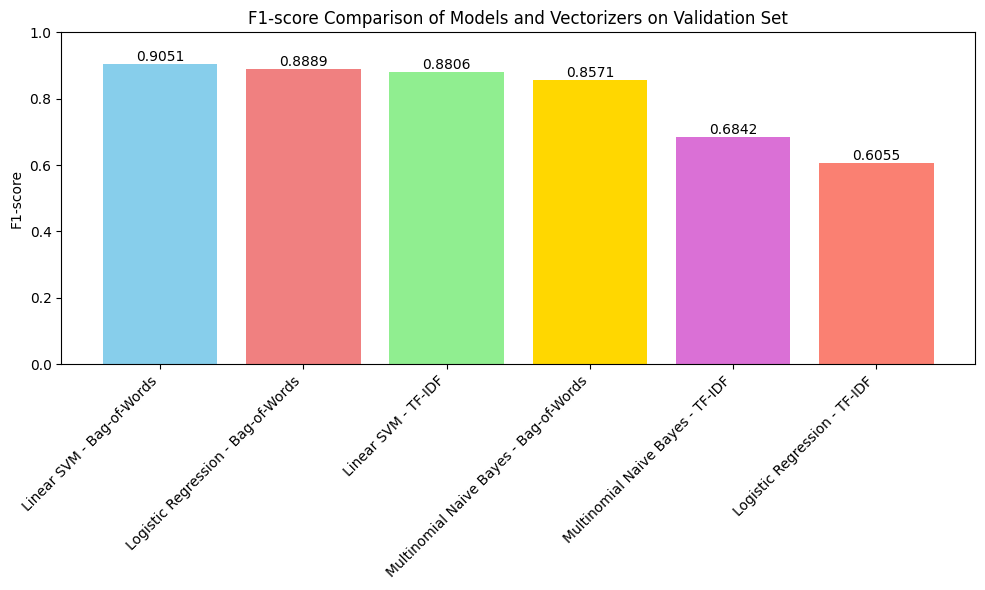

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a dictionary with the evaluation results
results = {
    'Model': ['Multinomial Naive Bayes', 'Multinomial Naive Bayes', 'Logistic Regression', 'Logistic Regression', 'Linear SVM', 'Linear SVM'],
    'Vectorizer': ['Bag-of-Words', 'TF-IDF', 'Bag-of-Words', 'TF-IDF', 'Bag-of-Words', 'TF-IDF'],
    'Accuracy': [0.9587, 0.9354, 0.9731, 0.9228, 0.9767, 0.9713],
    'Precision': [0.8023, 1.0000, 1.0000, 0.9706, 1.0000, 1.0000],
    'Recall': [0.9200, 0.5200, 0.8000, 0.4400, 0.8267, 0.7867],
    'F1-score': [0.8571, 0.6842, 0.8889, 0.6055, 0.9051, 0.8806]
}

results_df = pd.DataFrame(results)

# Sort by F1-score for better visualization
results_df = results_df.sort_values('F1-score', ascending=False)

# Create a bar plot for F1-score
plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['Model'] + ' - ' + results_df['Vectorizer'], results_df['F1-score'], color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'orchid', 'salmon'])
plt.ylabel('F1-score')
plt.title('F1-score Comparison of Models and Vectorizers on Validation Set')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1) # F1-score is between 0 and 1

# Add F1-score values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom', ha='center') # Adjust vertical alignment

plt.tight_layout()
plt.show()

## Discussion of Model Performance

Based on the evaluation results on the validation set, let's discuss the performance of the trained models.

### Generative vs. Discriminative Model Performance

Compare the performance of the Multinomial Naive Bayes (generative) models with the Logistic Regression and Linear SVM (discriminative) models.

### Impact of N-gram Size and Embedding Choice

Discuss how the choice of vectorizer (Bag-of-Words vs. TF-IDF) and the N-gram range (uni-gram + bi-gram) affected the results for each model type. If dense embeddings were successfully generated and evaluated, discuss their impact as well.

### Speed, Memory, and Explainability

Reflect on the potential differences in speed, memory usage, and explainability of the different models and feature representations used in this pipeline.